In [15]:
rm(list=ls())
load("Fig4_A_C.RData")
options(warn = -1) 
library(dplyr)
library(ggplot2)
library(cowplot)
library(patchwork)
load("meqtl_cpgs.RData")
load("heritable_cpgs.RData")

popColours <- c("Himba" = rgb(213/255, 94/255, 0/255), # red
                "\u2021Khomani San" = rgb(204/255, 121/255, 167/255), # purple/magenta
                "Baka" = rgb(230/255, 159/255, 0/255))


In [16]:
##plotting real p_value improvement after meqtl regression and 100 permutations of random meqtl regression for each cpg that was significant in EWAS

plot_list <- list()
for (pop in c("KHS", "Baka", "Himba")) {
    print(pop)
    p_val <- p_val_[[pop]]
    load(paste0("no_regress_sig_meqtl_cpgs_", pop, ".RData"))
    load(paste0("meqtl_regress_sig_cpgs_", pop, ".RData"))
    print("here")
    if (pop == "KHS") {
        pop_label_ <- "\u2021Khomani San"
        pop_label <- "‡Khomani San"
    } else {
        pop_label <- pop
        pop_label_ <- pop
    }
    p_val$population <- rep(pop_label_, nrow(p_val))

    p <- ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
        geom_point(data = subset(p_val, IsTarget == FALSE), aes(size = 3), color = "black", alpha = 0.3) +
        geom_point(data = subset(p_val, IsTarget == TRUE), aes(fill = population), size = 11, pch = 23, color = "black", stroke = 2.5) +
        geom_point(data = subset(p_val, IsTarget == TRUE), size = 11, shape = 9, color = "black", stroke = 2.5) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
        facet_wrap(~population, scales = "free") +
        theme_bw(base_size = 50) +
        theme(
            strip.text = element_text(size = 60, face="bold"),
            strip.background.x = element_rect(fill = popColours[pop_label]),
            legend.text = element_text(size = 55), 
            legend.title = element_text(size = 55),
            legend.box.margin = margin(0, 10, 0, 0),
            legend.position = "none",
            axis.text = element_text(size = 50),
            axis.title = element_text(size = 50, margin = margin(r = 10)),
            plot.title = element_text(size = 70),
            plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
        ) +
       scale_fill_manual(values = popColours) +
        guides(fill = "none", size = "none") +
        labs(
            x = "-log(P-value) Unadjusted",
            y = if (pop == "Himba") "-log(P-value) Top MeQTL Regressed" else ""
        ) 
    
    i <- 1
    print(i)
    while (i < 101) {
        load(paste0("fake_perms/", i, "beta_fake_meqtl_regress_", pop, ".RData"))
        fake_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress
        fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value)
        no_regress_sig_meqtl_cpgs$p_value_old <- -log10(no_regress_sig_meqtl_cpgs$P.value)          
        p_val <- merge(no_regress_sig_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

        # Add density plot to the existing plot
           p <- p + geom_point(data = p_val, aes(size = 2, color = "Random MeQTL"), alpha = 0.05) + scale_color_manual(values = c("Actual MeQTL" = "black", "Random MeQTL" = "red"))


        i <- i + 1
    }

    plot_list[[pop]] <- p
}




[1] "KHS"
[1] "here"
[1] 1


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] "Baka"
[1] "here"
[1] 1


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] "Himba"
[1] "here"
[1] 1


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [22]:
##plotting real p_value improvement after meqtl regression and 100 permutations of random meqtl regression for each cpg that was significant in meta_EWAS

save(list=c("meta_no_regress_sig_meqtl_cpgs", "meta_meqtl_regress_sig_cpgs"), file="figure4_metagen.RData")
# Calculate -log(p-value) for both datasets
meta_no_regress_sig_meqtl_cpgs$p_value_old <- -log10(meta_no_regress_sig_meqtl_cpgs$P.value.fix)
meta_meqtl_regress_sig_cpgs$p_value_meqtls <- -log10(meta_meqtl_regress_sig_cpgs$P.value.fix)
# Merge the datasets
p_val <- merge(meta_no_regress_sig_meqtl_cpgs, meta_meqtl_regress_sig_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

p_val$population <-  rep("Meta-Analysis", nrow(p_val))

p <- ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  # Map color to a variable for legend control
  geom_point(data = p_val, aes(size = 3, color = "Actual MeQTL"), alpha = 0.3) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  facet_wrap(~population, scales = "free") +
  theme_bw(base_size = 50) +
  theme(
    strip.text = element_text(size = 60, face="bold"),
    strip.background.x = element_rect(fill = "grey"),
    legend.text = element_text(size = 55), 
    legend.title = element_text(size = 55),
    legend.box.margin = margin(0, 10, 0, 0),
    legend.position = "right",
    axis.text = element_text(size = 50),
    axis.title = element_text(size = 50, margin = margin(r = 10)),
    plot.title = element_text(size = 70),
    plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
  ) +
  guides(size = "none") +  # Remove size legend
  labs(
    x = "-log(P-value) Unadjusted",
    y = ""
  ) + scale_fill_manual(values = popColours)

i <- 1
while (i < 101) {
    load(paste0("fake_perms/", "metagen_all3_fake_meqtl_regress_cpgs", i, ".RData"))
    fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value.fix)
    meta_no_regress_sig_meqtl_cpgs$p_value_old <- -log10(meta_no_regress_sig_meqtl_cpgs$P.value.fix)    
    p_val <- merge(meta_no_regress_sig_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
    p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old) 
    i <- i + 1
    # Add red points for permutations
    p <- p + geom_point(data = p_val, aes(size = 2, color = "Random MeQTL"), alpha = 0.05)
}

# Add color legend with scale_color_manual
p <- p + scale_color_manual(
  values = c("Actual MeQTL" = "black", "Random MeQTL" = "red"),
  name = "Data Type",
  guide = guide_legend(
    override.aes = list(
      size = 6,  # Increase point size in the legend
      alpha = 1  # Remove transparency from the legend points
    )
  )
)

top_legend <- get_legend(p)
 # Get legend from the right-most plot in row D-F


# Remove legends from individual plots 
p <- p + theme(legend.position = "none")

p <- plot_grid(p, labels = c("D"),  label_size = 50) 

In [23]:
top <- plot_grid(plot_list[["Himba"]], plot_list[["KHS"]], plot_list[["Baka"]], ncol = 3, labels = c("A", "B", "C"),
                     label_size = 50) 

In [24]:

load("Fig4_E_G.RData")

#Plot scatter plots of age vs methylation colored by genotype, include one legend for genotype
plot1 <- 
  snp_data_[["Himba"]] %>%
  mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
  ggplot(aes(age, meth_value)) +
  geom_point(aes(colour = V7), size = 11) +  # Increase point size here
  scale_colour_manual(values = c(
    "0/0" = "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
  ),  name = "Genotype") +
  #facet_wrap allows for the column labeling 
  facet_wrap(~cpg, scales = "free") +
  labs(x = "Age", y = "Methylation") +
  theme_minimal() + theme_bw(base_size = 50) + 
  theme( 
    strip.text = element_text(size = 60, face="bold"),
    #colors the column labeling based on pop colors
    strip.background.x = element_rect(fill = popColours["Himba"]),
    legend.position = "right",
    legend.text = element_text(size = 55), 
    legend.title = element_text(size = 55),
    legend.box.margin = margin(0, 10, 0, 0),
    axis.text = element_text(size = 50),
    axis.title = element_text(size = 50, margin = margin(r = 10)),
    plot.title = element_text(size = 70),
    plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
  ) +
  scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))


plot2 <- 
  as.data.frame(snp_data_[["‡Khomani San"]]) %>%
  mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
  ggplot(aes(age, meth_value)) +
  geom_point(aes(colour = V7), size = 11) +  # Increase point size here
  scale_colour_manual(values = c(
    "0/0" = "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
  ),  name = "Genotype") +
  facet_wrap(~cpg, scales = "free") +
  labs(x = "Age", y = "Methylation") +
  theme_minimal() + theme_bw(base_size = 50) + 
  theme(
    strip.text = element_text(size = 60, face="bold"),
    strip.background.x = element_rect(fill = popColours["‡Khomani San"]),
    legend.position = "right",
    legend.text = element_text(size = 55), 
    legend.title = element_text(size = 55),
    legend.box.margin = margin(0, 10, 0, 0),
    axis.text = element_text(size = 50),
    axis.title = element_text(size = 50, margin = margin(r = 10)),
    plot.title = element_text(size = 70),
    plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
  ) +
  scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))


plot3 <- 
  snp_data_[["Baka"]] %>%
  mutate(V7 = factor(V7, levels = c("0/0", "0/1", "1/1"))) %>%  # Ensure V7 is a factor
  ggplot(aes(age, meth_value)) +
  geom_point(aes(colour = V7), size = 11) +  # Increase point size here
  scale_colour_manual(values = c(
    "0/0" = "#999933", "0/1" = "#56B4E8", "1/1" = "#004848"
    
  ),  name = "Genotype") +
  facet_wrap(~cpg, scales = "free") +
  labs(x = "Age", y = "Methylation") +
  theme_minimal() + theme_bw(base_size = 50) + 
  theme(
    strip.text = element_text(size = 60, face="bold"),
    strip.background.x = element_rect(fill = popColours["Baka"]),
    legend.text = element_text(size = 55), 
    legend.title = element_text(size = 55),
    legend.box.margin = margin(0, 10, 0, 0),
    legend.position = "right",
    axis.text = element_text(size = 50),
    axis.title = element_text(size = 50, margin = margin(r = 10)),
    plot.title = element_text(size = 70),
    plot.margin = margin(t = 20, r = 30, b = 20, l = 20)
  ) +
  scale_x_continuous(limits = c(0, 95), breaks = seq(10, 80, by = 20))


# # Extract legends from the right-most plots
legend_E_G <- get_legend(plot1)  # Get legend from the right-most plot in row A-C


# Remove legends from individual plots 
plot1 <- plot1 + theme(legend.position = "none")
plot2 <- plot2 + theme(legend.position = "none")
plot3 <- plot3 + theme(legend.position = "none")




# # Combine plots in rows without legends
combined_plots_E_G <- plot_grid(plot1, plot2, plot3, nrow = 1, labels = c("E", "F", "G"), rel_widths = c(1, 1, 1), label_size = 50)


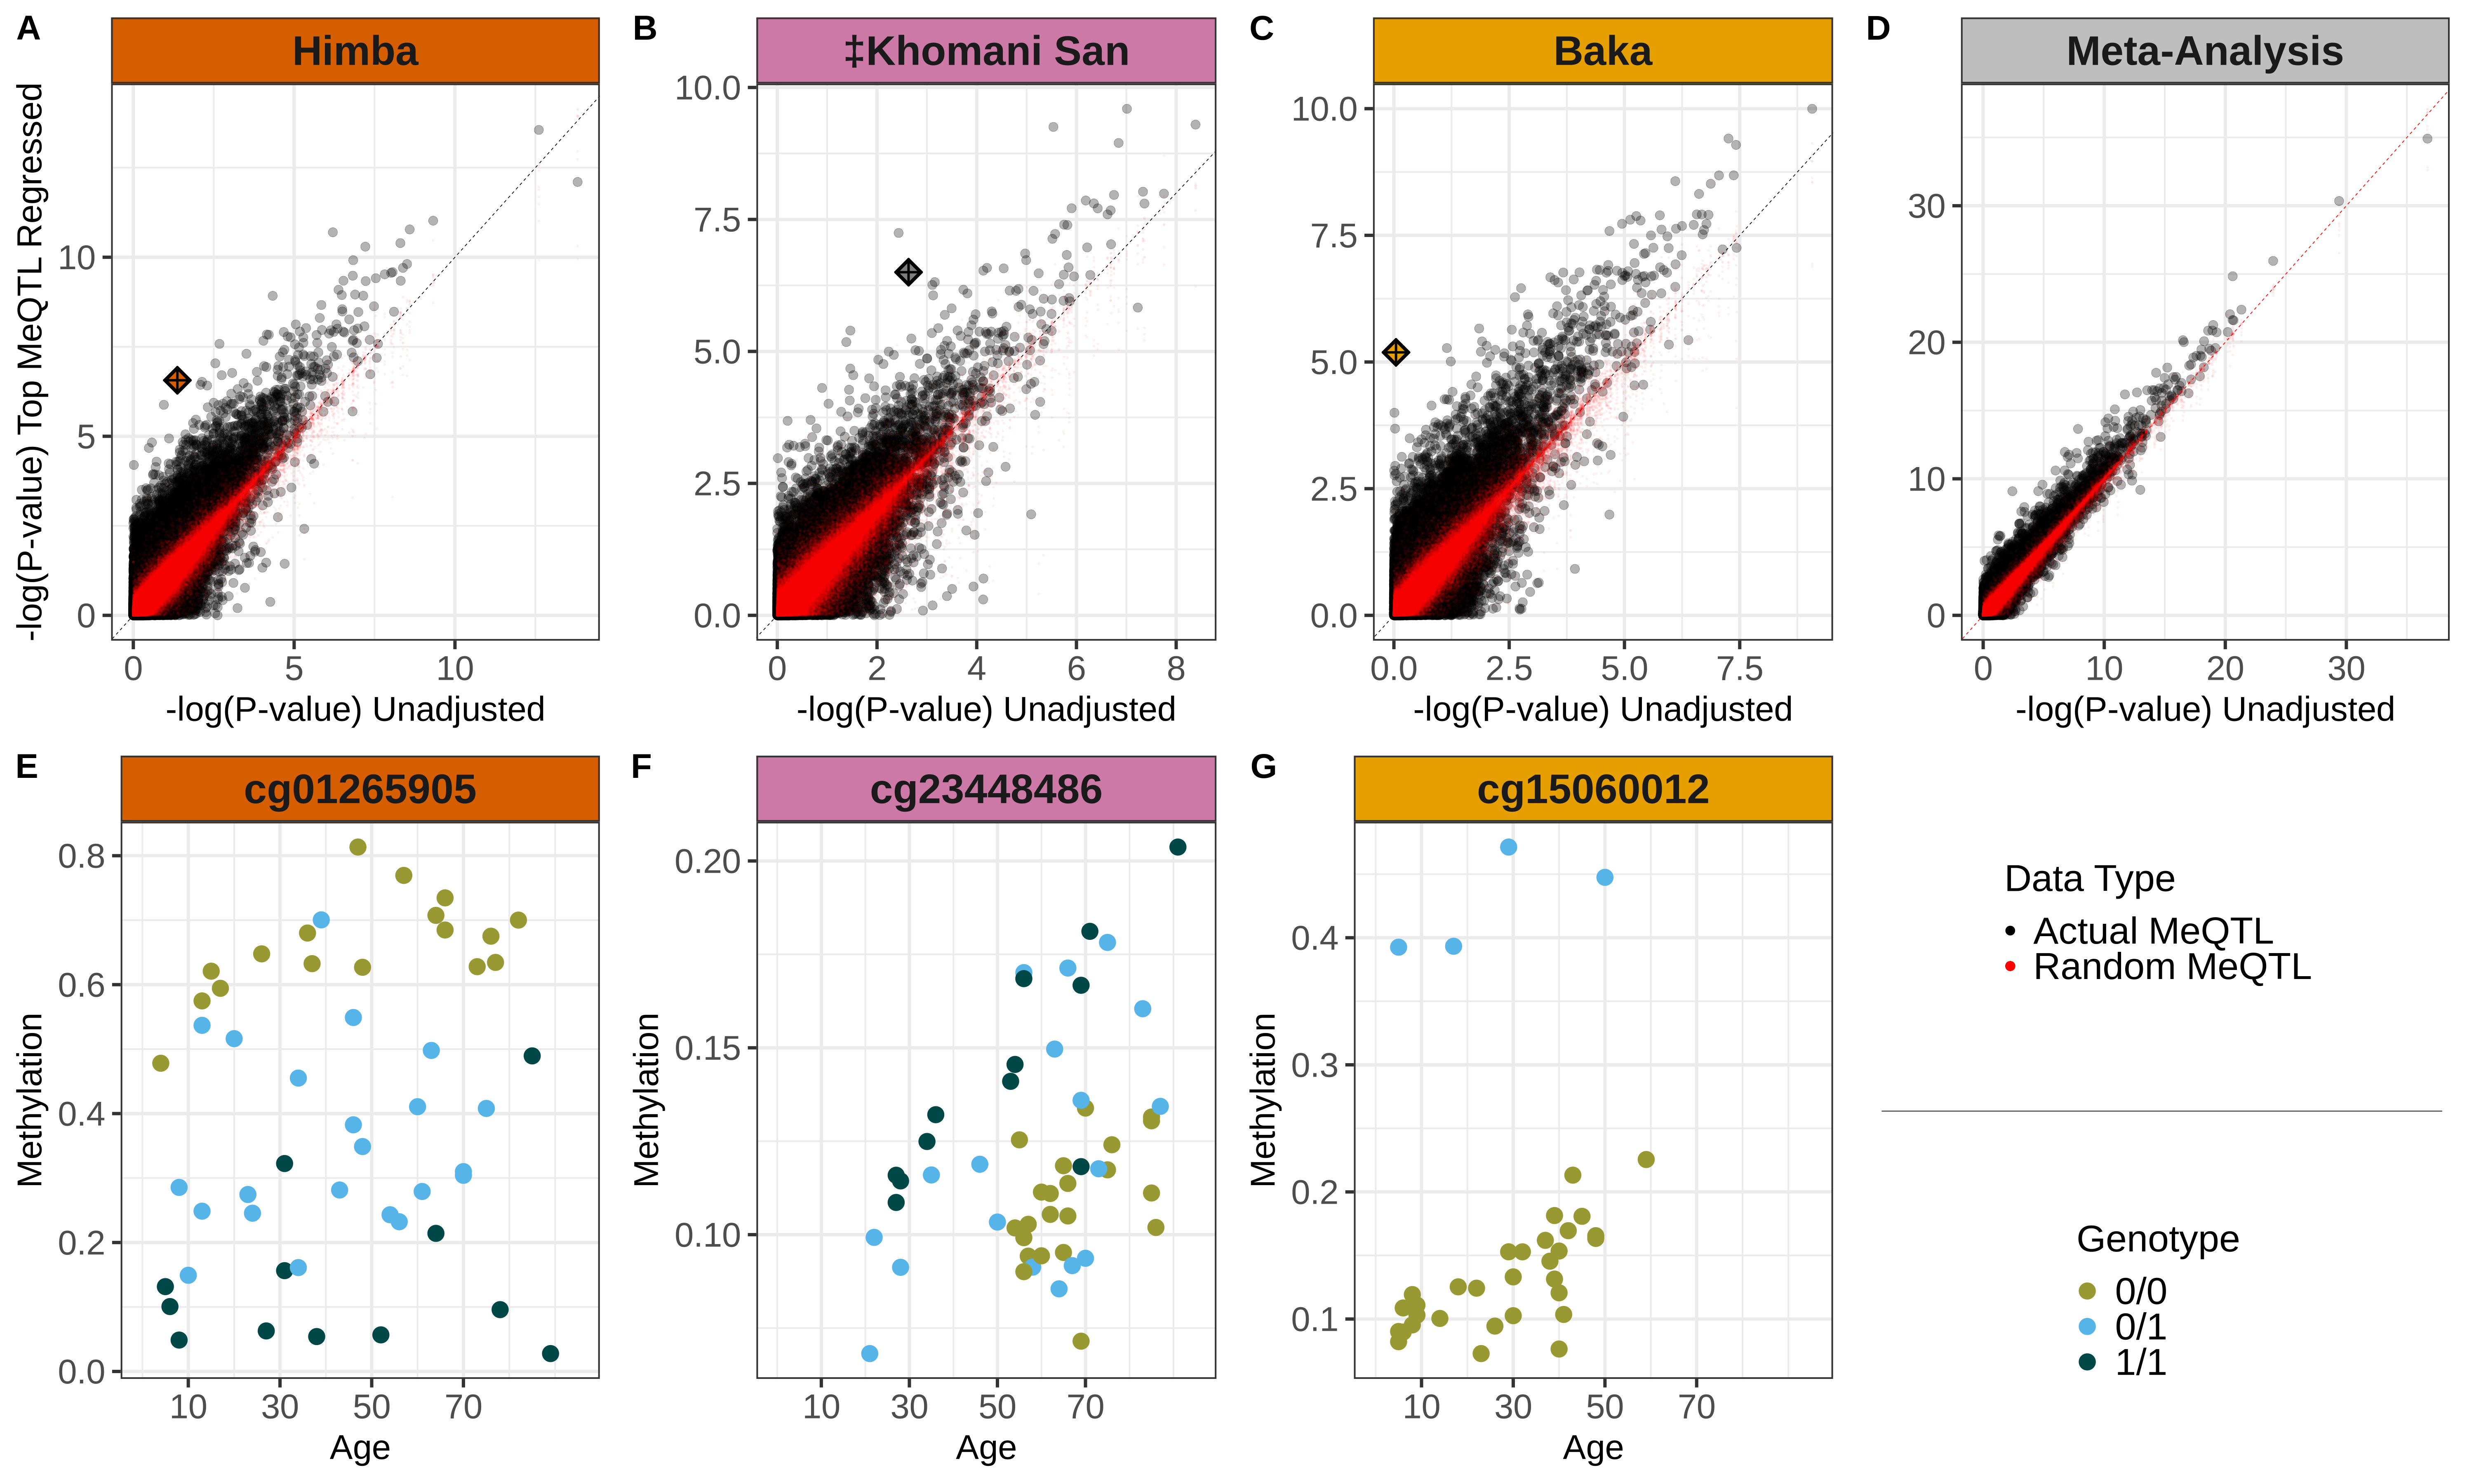

In [25]:
options(repr.plot.width = 50, repr.plot.height = 30)

# Combine the legends into a single plot with a solid line between them
legends_combined <- plot_grid(
  top_legend, 
  legend_E_G,
  ncol = 1, 
  align = 'v', 
  axis = 'tb', 
  rel_heights = c(1, 0.05, 1)  # Adjust the relative heights to add space for a line
)
# Vertical line
horiz_line <- ggplot() + 
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 0), color = "black", size = 0.5) + 
  theme_void()

# Combine legends side by side with a vertical line in between
legends_combined <- plot_grid(
  top_legend, 
  horiz_line,   # Vertical line between the legends
  legend_E_G,
  ncol = 1,        # Set ncol to 1 for legends on top of each other
  align = 'v',     # Align vertically to ensure proper alignment
  axis = 'tb',     # Align the axis from top to bottom
  rel_heights = c(1, 0.05, 1)  # Adjust relative heights for the legends and the line
)


# Add the combined legends grid to the bottom of the second row in your final plot
final_plot_with_legend <- (
  top + p  + plot_layout(widths = c(3, 1)) # First row: plot p and top legend
) /
(
  combined_plots_E_G + legends_combined + plot_layout(widths = c(3, 1)) # Second row with combined legends
)

# Display the final plot
print(final_plot_with_legend)

